In [85]:
import pandas as pd 
import matplotlib.pyplot as mtp
import numpy as nm

data_set = pd.read_csv('Big Mart Sale Data.csv')

In [86]:
data_set


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [87]:
data_set.fillna(method='ffill', inplace=True)

/var/folders/qm/1glspl_s0tz01kdn5vsmgmx40000gn/T/ipykernel_19642/4144837875.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_set.fillna(method='ffill', inplace=True)


In [88]:
x = data_set[['Item_Weight','Item_Visibility','Item_MRP']]
y = data_set['Item_Outlet_Sales']


In [89]:
x

,Item_Weight,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
3,19.200,0.000000,182.0950
4,8.930,0.000000,53.8614
...,...,...,...
8518,6.865,0.056783,214.5218
8519,8.380,0.046982,108.1570
8520,10.600,0.035186,85.1224
8521,7.210,0.145221,103.1332


In [90]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [112]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [113]:
y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)

In [114]:
y_pred

array([2374.69233368, 1237.45085445, 2212.54501148, ..., 4068.34965696,
        444.43706079, 4021.88127868])

In [115]:
x_pred

array([2156.99679495, 1014.73506119,  704.67603608, ..., 1488.51013742,
       1717.07259969, 2926.9403525 ])

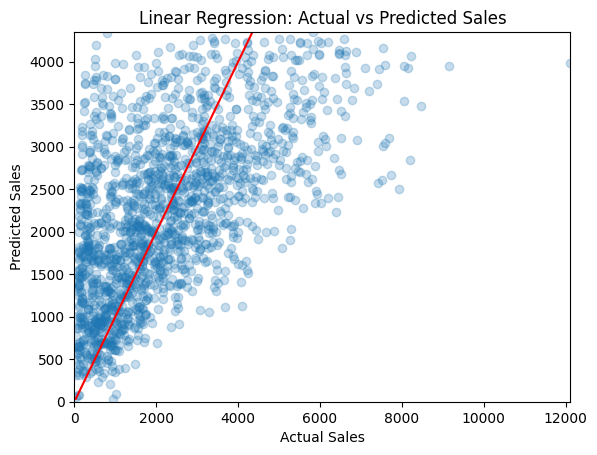

In [119]:
mtp.scatter(y_test, y_pred, alpha = 0.25) 
mtp.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color='red')
mtp.xlim(0, max(y_test))
mtp.ylim(0, max(y_pred))
mtp.xlabel('Actual Sales')
mtp.ylabel('Predicted Sales')
mtp.title('Linear Regression: Actual vs Predicted Sales')
mtp.show()

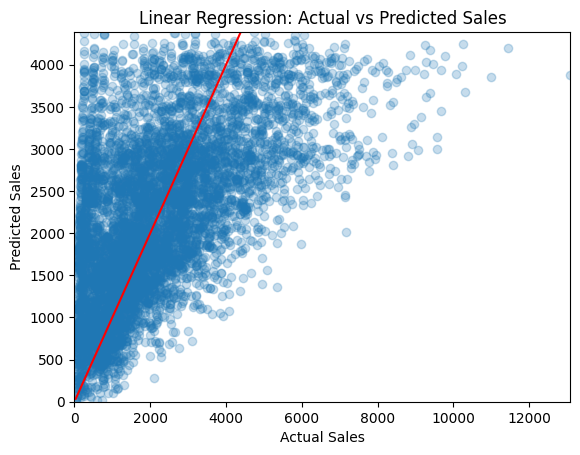

In [118]:
mtp.scatter(y_train, x_pred, alpha=0.25) 
mtp.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
mtp.xlim(0, max(y_train))
mtp.ylim(0, max(x_pred))
mtp.xlabel('Actual Sales')
mtp.ylabel('Predicted Sales')
mtp.title('Linear Regression: Actual vs Predicted Sales')
mtp.show()